In [2]:
# Necessary imports
import os
import time
import timeit
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import emoji
import string
from pprint import pprint
from time import time
import collections
%matplotlib inline

# Modelling packages
from sklearn import ensemble
from sklearn.feature_selection import chi2, f_classif, SelectKBest 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score, classification_report, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble

# Natural Language processing
import nltk
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_rcv1
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Clustering packages
import sklearn.cluster as cluster
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from scipy.spatial.distance import cdist

# Plotly packages
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

#Labelling packages
import nltk
nltk.downloader.download('vader_lexicon')

from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rabia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Loading Feb 2015 Data
Source = https://www.kaggle.com/crowdflower/twitter-airline-sentiment <br>

This data is provided for public at kaggle (check above link). this data came originally from Crowdflower's data for Eeveryone library https://www.figure-eight.com/data-for-everyone/. <br>

This data is a a collect of 14k tweets scrapped from twitter during February 2015, these tweets were labeled with a sentiment of (positive, negative, and neutral). it contains a lot of information, we will use only 4 of them in this analysis (airline sentiment,  negative reason, airline, and text).


In [162]:
# Import the data
tweets = pd.read_csv("C:/Users/rabia/Desktop/Thinkful/Final/tweets.csv")

# Preview the dataset
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [163]:
# Condense dataframe to only include what we want
tweets = tweets[['airline_sentiment', 'negativereason', 'airline', 'text']]

In [164]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
airline_sentiment    14640 non-null object
negativereason       9178 non-null object
airline              14640 non-null object
text                 14640 non-null object
dtypes: object(4)
memory usage: 457.6+ KB


All our data is strings, with soem missing values under **"negativereason"** column. It could be because no negative reason for positive and neutral sentiments.

In [6]:
negative = tweets.loc[tweets['airline_sentiment'] == 'negative']
negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9178 entries, 3 to 14638
Data columns (total 4 columns):
airline_sentiment    9178 non-null object
negativereason       9178 non-null object
airline              9178 non-null object
text                 9178 non-null object
dtypes: object(4)
memory usage: 358.5+ KB


Now it is clear. All the missing values for **"negativereason"** column was on positive and neutral columns.

In [165]:
# Describe unique occurences for each categorical variable
tweets.nunique()

airline_sentiment        3
negativereason          10
airline                  6
text                 14427
dtype: int64

We have 10 negative reasons, 3 different sentiments, 6 differents airlines, and 14,427 unique lines of text.Looks like there is duplicated text here.

In [166]:
#Drop deplicated texts
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
len(tweets)

14240

In [170]:
tweets['text'].nunique()

14240

Now, no duplicates. Great !!

# Data Visulization

### Percetage of Tweets for each Airline
Virgin America has the lease number of tweets compare to other airlines. for the rest of the airlines they have almost balanced distribution of tweets between them. United has the highest number of tweets (26.66%).

In [179]:
tweets['airline'].value_counts()

United            3796
US Airways        2902
American          2435
Southwest         2401
Delta             2204
Virgin America     502
Name: airline, dtype: int64

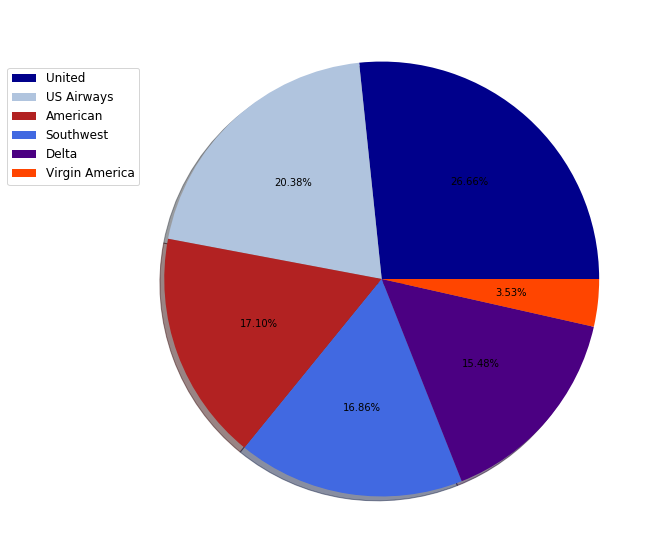

In [177]:
plt.figure(figsize=(18,10))

size = tweets['airline'].value_counts().tolist()
colors = ['darkblue', 'lightsteelblue', 'firebrick', 'royalblue', 'indigo', 'orangered']
labels = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.show()

### Tweets Sentiment
The majority of the tweets were negative (63%), the remaining tweets are almost balanced between positive and neutral tweets 

In [180]:
tweets['airline_sentiment'].value_counts()

negative    8988
neutral     3017
positive    2235
Name: airline_sentiment, dtype: int64

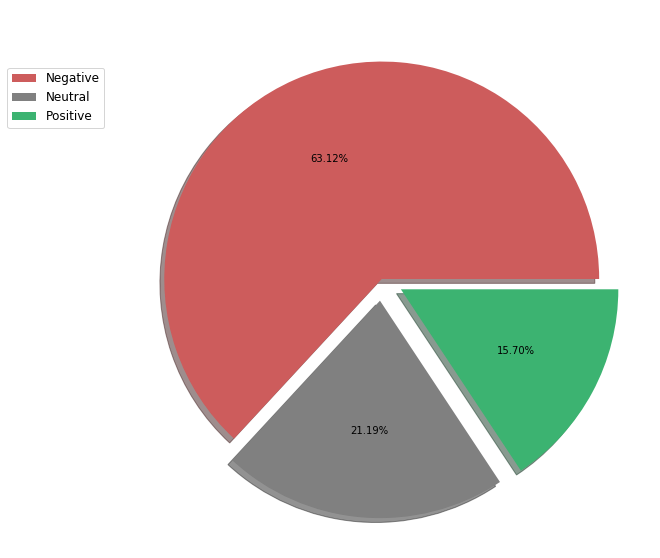

In [181]:
plt.figure(figsize=(18,10))

size = tweets['airline_sentiment'].value_counts().tolist()
colors = ['indianred', 'grey', 'mediumseagreen']
labels = ['Negative', 'Neutral', 'Positive']
explode = [0, 0.1, 0.1]

plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.show()

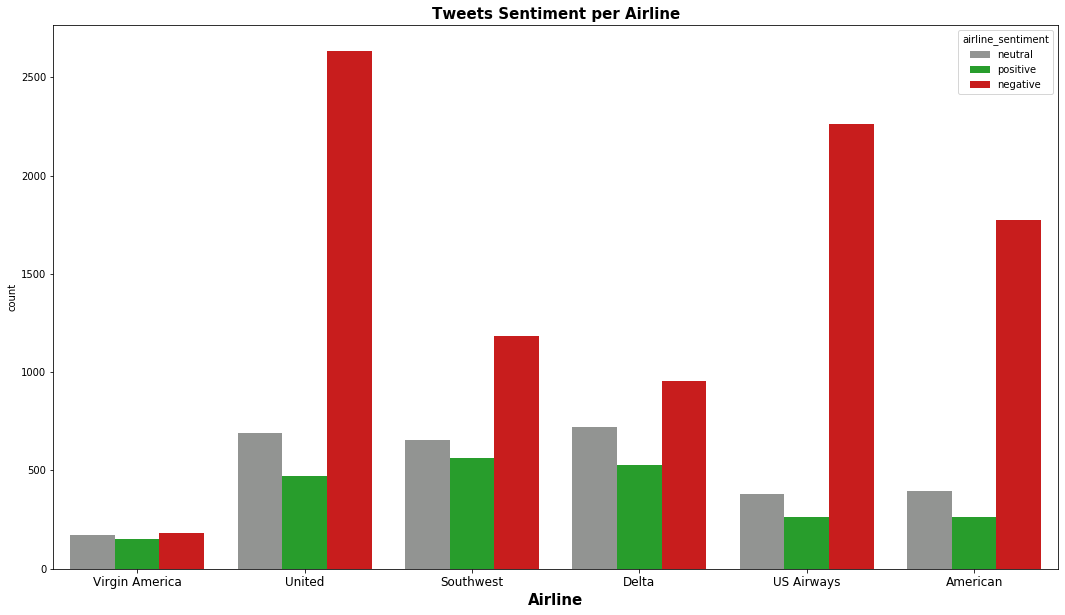

In [175]:
plt.figure(figsize=(18,10))
colors = ['grey', 'green', 'red']
sns.countplot(x = 'airline', hue = 'airline_sentiment', data = tweets, palette=sns.xkcd_palette(colors))
plt.title('Tweets Sentiment per Airline', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 12)
plt.xlabel('Airline', fontsize = 15, fontweight="bold")
plt.show()

As you can see above, **American, US Airways, and United** has the **highest numbers** of negative tweets. US Airways are no more available  because it has been merged with American in 2015 (few months after these tweets). This makes current American the world's biggest airline in the world but also the airline with highest number of negative tweets among thier competitors in US.

In [185]:
# Creating data frame for each airline include its own tweets
virgin = tweets.loc[tweets['airline'] == 'Virgin America']
united = tweets.loc[tweets['airline'] == 'United']
southwest = tweets.loc[tweets['airline'] == 'Southwest']
delta = tweets.loc[tweets['airline'] == 'Delta']
us = tweets.loc[tweets['airline'] == 'US Airways']
american = tweets.loc[tweets['airline'] == 'American']

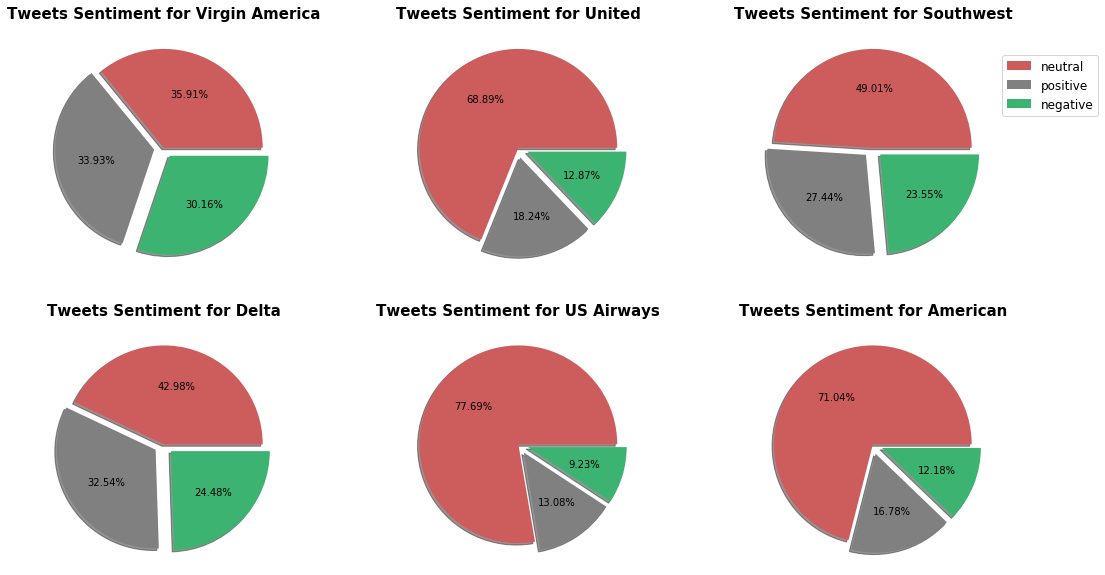

In [13]:
plt.figure(figsize=(18,10))

size = virgin['airline_sentiment'].value_counts().tolist()
colors = ['indianred', 'grey', 'mediumseagreen']
labels = virgin['airline_sentiment'].unique().tolist()
explode = [0, 0.1, 0.1]

plt.subplot(2, 3, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Virgin America', fontweight="bold", fontsize = 15)
plt.axis('off')

size = united['airline_sentiment'].value_counts().tolist()

plt.subplot(2, 3, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for United', fontweight="bold", fontsize = 15)
plt.axis('off')

size = southwest['airline_sentiment'].value_counts().tolist()

plt.subplot(2, 3, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Southwest', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(1.0,0.9), prop={'size': 12}, loc="upper left")

size = delta['airline_sentiment'].value_counts().tolist()

plt.subplot(2, 3, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Delta', fontweight="bold", fontsize = 15)
plt.axis('off')

size = us['airline_sentiment'].value_counts().tolist()

plt.subplot(2, 3, 5)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for US Airways', fontweight="bold", fontsize = 15)
plt.axis('off')

size = american['airline_sentiment'].value_counts().tolist()

plt.subplot(2, 3, 6)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for American', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

Again, American and US Airways have the **highest percentage** of negative tweets to overall tweets. The have above average percentage of ngeative tweets

### Reasons for Negative Tweets (All Airlines)
**Customer service** is the highest reason for negative tweets follwed by **late flight**.

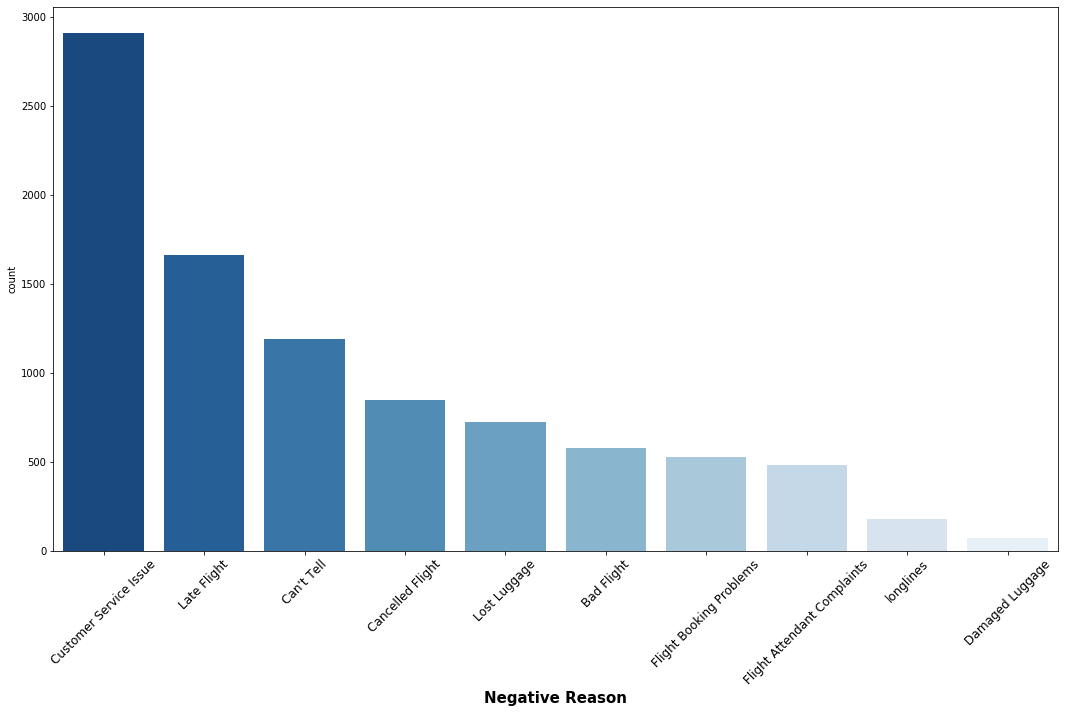

In [184]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'negativereason', data = negative, order = negative['negativereason'].value_counts().index, 
              palette = "Blues_r")
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Negative Reason', fontsize = 15, fontweight="bold")
plt.show()

### Reasons for Negative Tweets (American)
**Customer service** is the top reason for negative tweets here as well, then followed by **late flight** too. Difference of customer service reason compare to other reasons is much higher for American compare to all airlines chart above.

In [186]:
# Dataframe for American and US Airway negative tweets
negative_american = negative.loc[(negative['airline'] == 'US Airways') | (negative['airline'] == 'American')]
# Dataframe for other airlines tweets (except smerican and Us Airways) negative tweets
negative_not_american = negative.loc[(negative['airline'] != 'US Airways') & (negative['airline'] != 'American')]

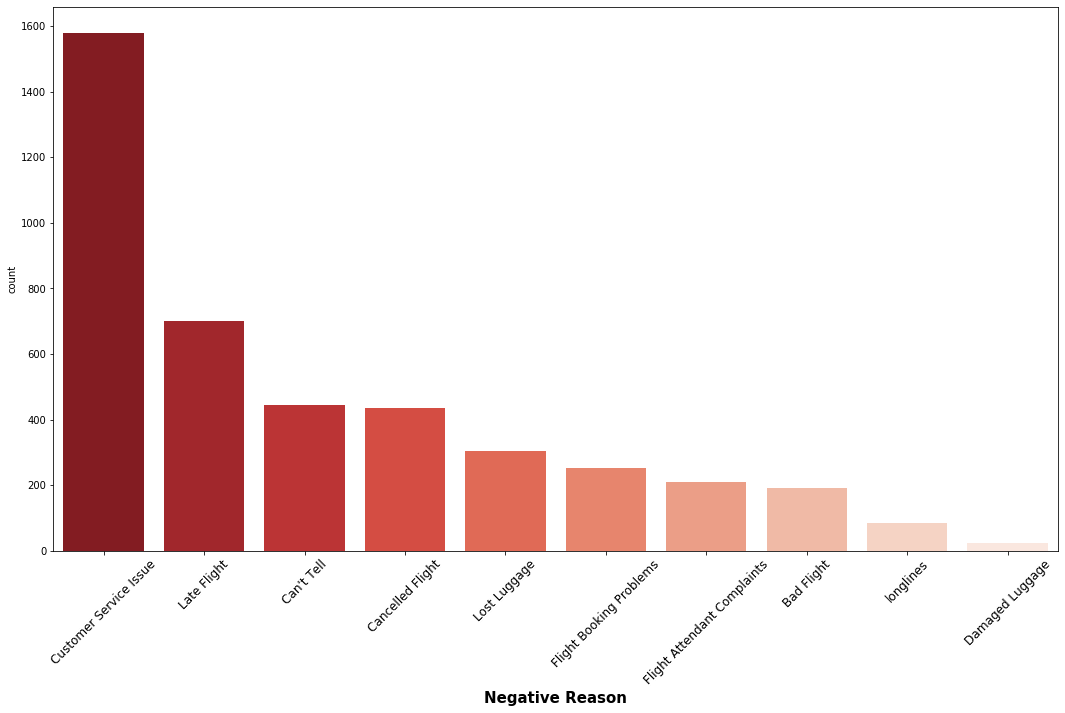

In [187]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'negativereason', data = negative_american, 
              order = negative_american['negativereason'].value_counts().index, palette = "Reds_r")
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Negative Reason', fontsize = 15, fontweight="bold")
plt.show()

### Reasons for Negative Tweets (All Airlines except American)
Still **customer service** is the top reason of negative tweets but it is not as high compare to other reasons as the case for American. It looks like American has issue with customer service, and this is the reaons of increased number of negative tweets compare to thier competitors.

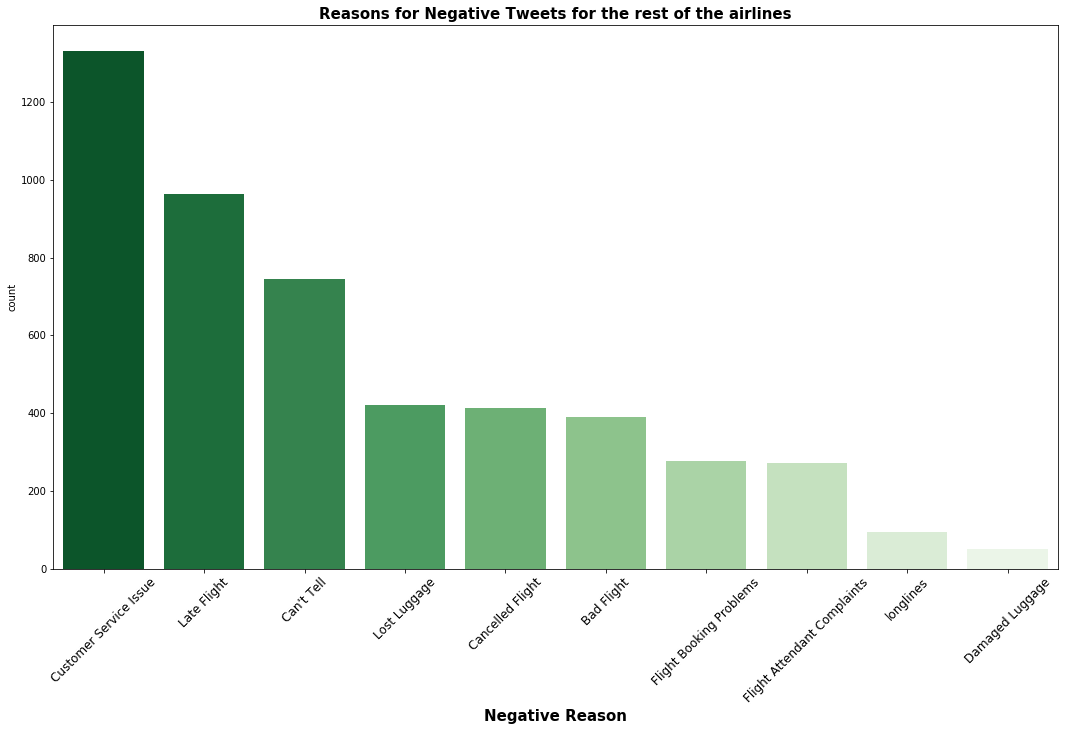

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'negativereason', data = negative_not_american, 
              order = negative_not_american['negativereason'].value_counts().index, palette = "Greens_r")
plt.title('Reasons for Negative Tweets for the rest of the airlines', fontweight="bold", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Negative Reason', fontsize = 15, fontweight="bold")
plt.show()

### Reasons for Negative Tweets (Airlines share per reason)

In [188]:
# Dataframes filtered by each negative reason indpendantly 
cs = negative.loc[negative['negativereason'] == 'Customer Service Issue']
late = negative.loc[negative['negativereason'] == 'Late Flight']
no_clear = negative.loc[negative['negativereason'] == "Can't Tell"]
cancel = negative.loc[negative['negativereason'] == 'Cancelled Flight']
lost = negative.loc[negative['negativereason'] == 'Lost Luggage']
booking = negative.loc[negative['negativereason'] == 'Flight Booking Problems']
fa = negative.loc[negative['negativereason'] == 'Flight Attendant Complaints']
bad = negative.loc[negative['negativereason'] == 'Bad Flight']
lines = negative.loc[negative['negativereason'] == 'longlines']
damaged = negative.loc[negative['negativereason'] == 'Damaged Luggage']

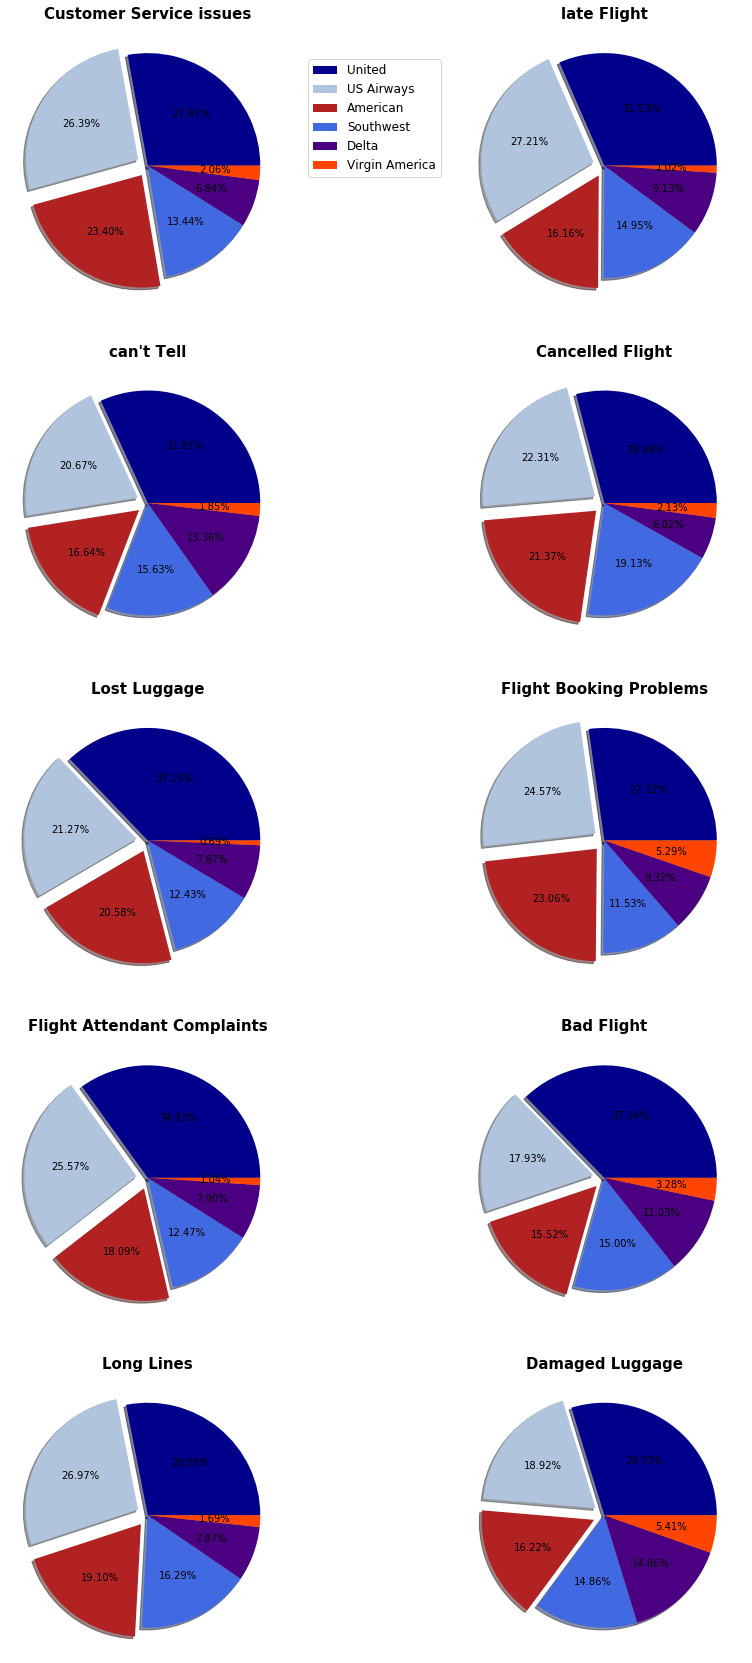

In [18]:
plt.figure(figsize=(15,30))

size = cs['airline'].value_counts().tolist()
colors = ['darkblue', 'lightsteelblue', 'firebrick', 'royalblue', 'indigo', 'orangered']
labels = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
explode = [0.0, 0.1, 0.1, 0, 0, 0]

plt.subplot(5, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Customer Service issues', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(1.05,0.9), prop={'size': 12}, loc="upper left")

size = late['airline'].value_counts().tolist()

plt.subplot(5, 2, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('late Flight', fontweight="bold", fontsize = 15)
plt.axis('off')

size = no_clear['airline'].value_counts().tolist()

plt.subplot(5, 2, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title("can't Tell", fontweight="bold", fontsize = 15)
plt.axis('off')

size = cancel['airline'].value_counts().tolist()

plt.subplot(5, 2, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Cancelled Flight', fontweight="bold", fontsize = 15)
plt.axis('off')

size = lost['airline'].value_counts().tolist()

plt.subplot(5, 2, 5)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Lost Luggage', fontweight="bold", fontsize = 15)
plt.axis('off')

size = booking['airline'].value_counts().tolist()

plt.subplot(5, 2, 6)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Flight Booking Problems', fontweight="bold", fontsize = 15)
plt.axis('off')

size = fa['airline'].value_counts().tolist()

plt.subplot(5, 2, 7)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Flight Attendant Complaints', fontweight="bold", fontsize = 15)
plt.axis('off')

size = bad['airline'].value_counts().tolist()

plt.subplot(5, 2, 8)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Bad Flight', fontweight="bold", fontsize = 15)
plt.axis('off')

size = lines['airline'].value_counts().tolist()

plt.subplot(5, 2, 9)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Long Lines', fontweight="bold", fontsize = 15)
plt.axis('off')

size = damaged['airline'].value_counts().tolist()

plt.subplot(5, 2, 10)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Damaged Luggage', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

As you can see in the above pie charts, almost **50%** of the negative tweets due to **customer service** and **flight booking problems** was for American (American + US Airways).

### Most Repeated Words in negative Tweets (All Airlines)
**Flight** is abviously the top repeated word since we are talking about airlines. Words like **bag, time, now, hour, help, and customer service** are big part of the top repeated words. this indicates the furstration of customers due to **time** (time, now, hour), **provided service** (customer service, help), there are issues with bags, most proberly it is related to lost bag since **lost luggage** is one of the top bagagge related reasons for negative tweets.

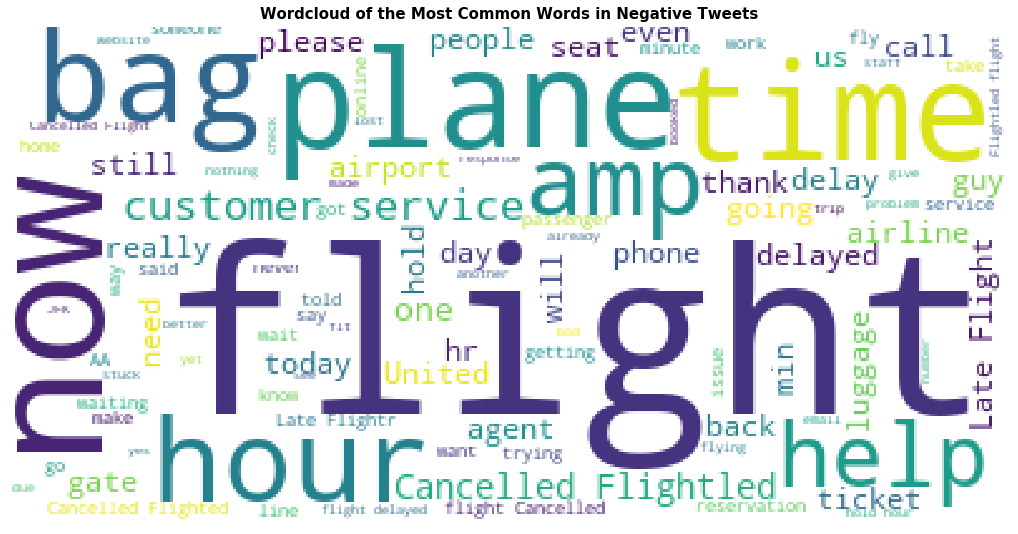

In [20]:
# Generates a wordcloud of the most common words in negative tweets
df=tweets[tweets['airline_sentiment']== 'negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

### Most Repeated Words in negative Tweets (American)
**Flight** again is the top repeated word. Words like **time, now, hour, help, cancelled flight, agent, gate, and customer service** are big part of the top repeated words. American passengers are also furstrated for time and customer service  reasons. words like agent, gate, and cancelled flight indicate extra probelms for American compare to cometitors.

In [19]:
# Dataframe filtered by each negative reason indpendantly 
tweets_american = tweets.loc[(tweets['airline'] == 'US Airways') | (tweets['airline'] == 'American')]

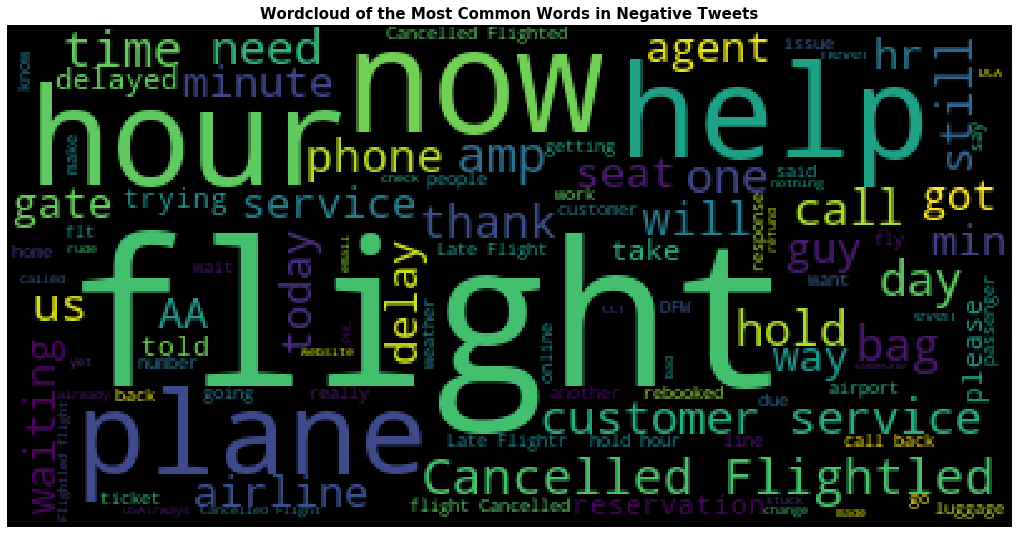

In [21]:
# Generates a wordcloud of the most common words in negative tweets
df=tweets_american[tweets_american['airline_sentiment']== 'negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

# Feature Engineering

## Text variable
To analyze the text variable we create a class **TextCounts**. In this class we compute some basic statistics on the text variable. This class can be used later in a Pipeline, as well.

* **count_words** : number of words in the tweet
* **count_mentions** : referrals to other Twitter accounts, which are preceded by a @
* **count_hashtags** : number of tag words, preceded by a #
* **count_capital_words** : number of uppercase words, could be used to *"shout"* and express (negative) emotions
* **count_excl_quest_marks** : number of question or exclamation marks
* **count_urls** : number of links in the tweet, preceded by http(s)
* **count_emojis** : number of emoji, which might be a good indication of the sentiment

In [22]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [23]:
tweets_eda = TextCounts().fit_transform(tweets.text)
# Add airline_sentiment to tweets_eda
tweets_eda['airline_sentiment'] = tweets['airline_sentiment']
tweets_eda.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment
0,4,2,0,0,0,0,0,neutral
1,10,1,0,0,0,0,0,positive
2,13,1,0,0,1,0,0,neutral
3,18,1,0,0,0,0,0,negative
4,11,1,0,0,0,0,0,negative


Below we show the distribution of each feature among the 3 categoris of sentimenet

In [24]:
def show_dist(df, col):
    print('Data Distribtuion of ' + col + ' Feature')
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='airline_sentiment', height=5, hue='airline_sentiment', palette="winter_r")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Data Distribtuion of count_words Feature


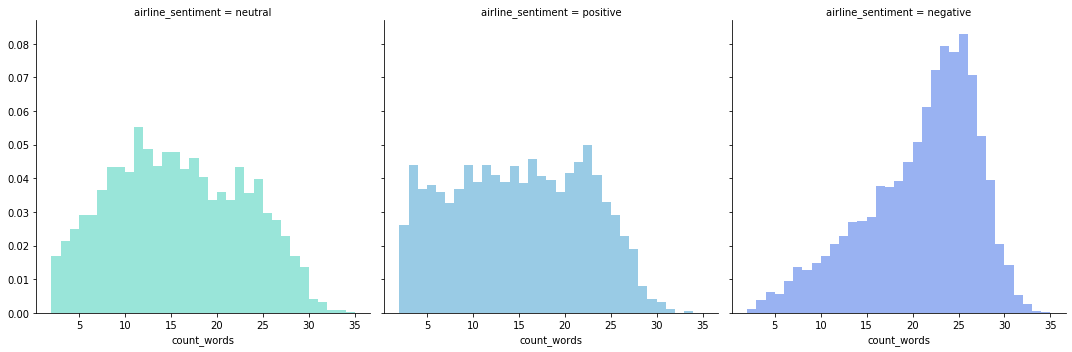

In [25]:
show_dist(tweets_eda, 'count_words')

Data Distribtuion of count_mentions Feature


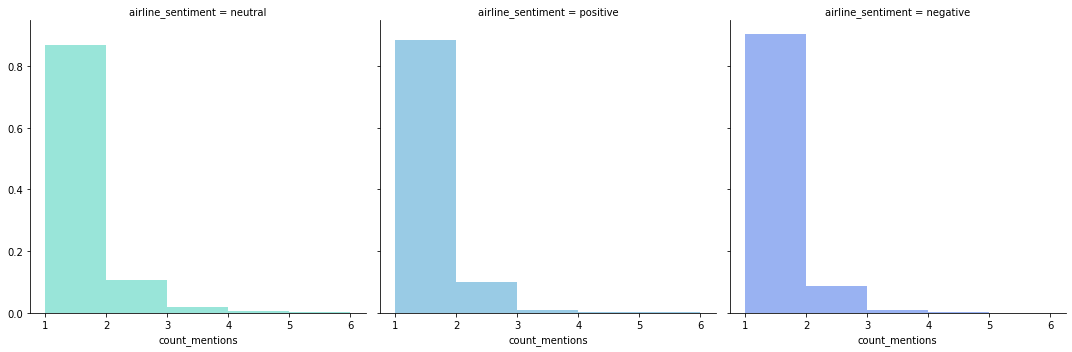

In [26]:
show_dist(tweets_eda, 'count_mentions')

Data Distribtuion of count_hashtags Feature


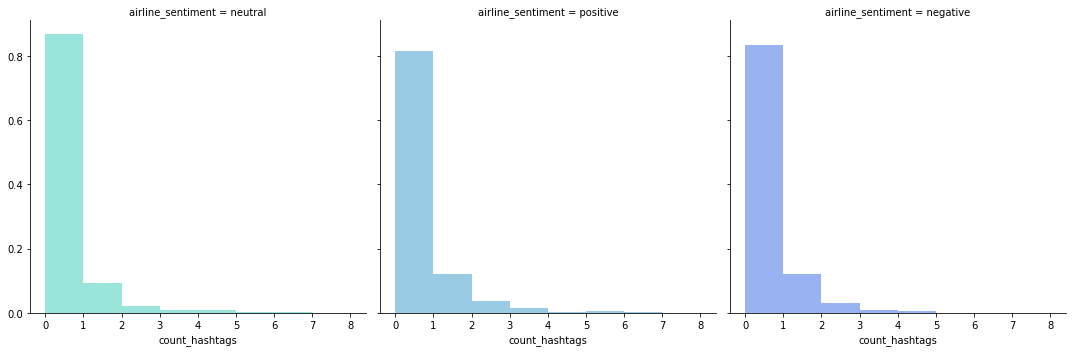

In [27]:
show_dist(tweets_eda, 'count_hashtags')

Data Distribtuion of count_capital_words Feature


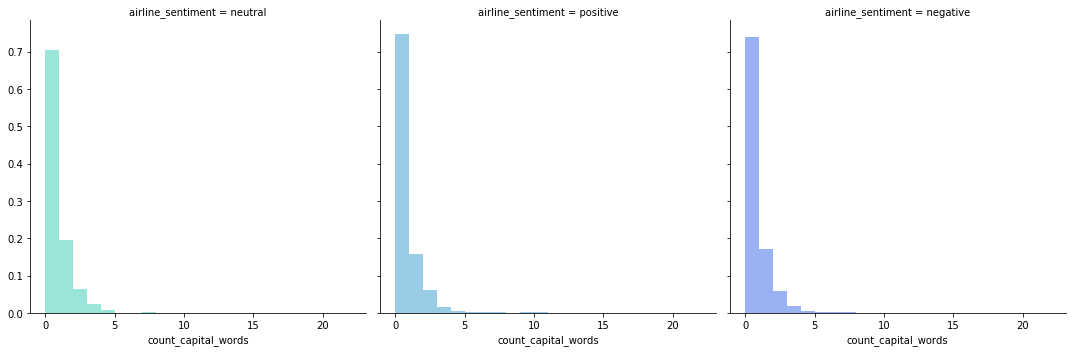

In [28]:
show_dist(tweets_eda, 'count_capital_words')

Data Distribtuion of count_excl_quest_marks Feature


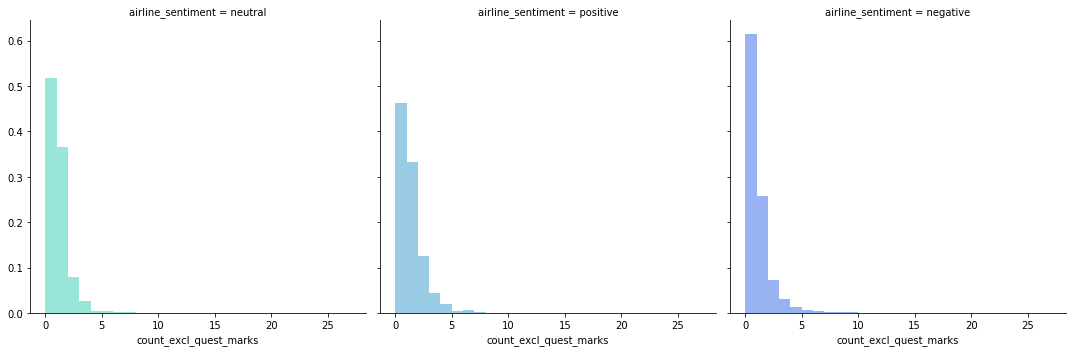

In [29]:
show_dist(tweets_eda, 'count_excl_quest_marks')

Data Distribtuion of count_urls Feature


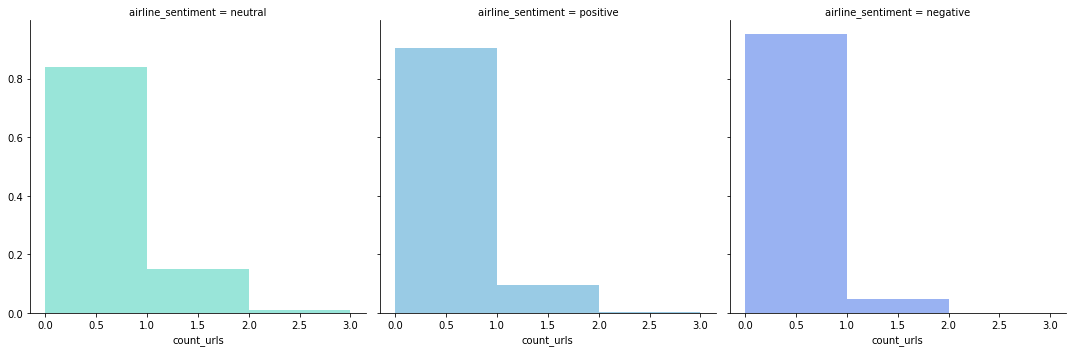

In [30]:
show_dist(tweets_eda, 'count_urls')

Data Distribtuion of count_emojis Feature


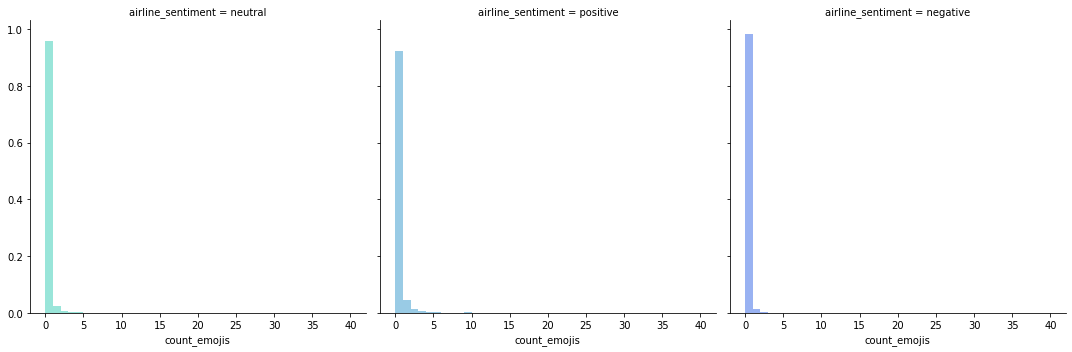

In [31]:
show_dist(tweets_eda, 'count_emojis')

- **Words counts** in the tweets is relatively low. Maximum number of words is 36 and there are tweets with only 2 words.In general, Negative tweets distribution are skewed to the left compare to uniform distribution for other sentiments. this indicates negative tweets contain more words than neutral or positive tweets.
- There seems to be no difference in **number of mentions** with regard to the sentiment. Most of the tweets has only one mention with a maximum mentions of 6.
- Most of the tweets do not contain **hash tags**. No difference in number of hash tags with regard to the sentiment.
* Most of the tweets do not contain **capitalized words** and we do not see a difference in distribution between the sentiments.
* The positive tweets seem to be using a bit more **exclamation or question marks**.
* Most tweets do not contain a **URL** and do not use **emojis**. 

# Text Cleaning
Before we start using the tweets' text we clean it. We'll do the this in the class CleanText:
- remove the **mentions**, as we want to make the model generalisable to tweets of other airline companies too.
- remove the **hash tag sign** (#) but not the actual tag as this may contain information
- set all words to **lowercase**
- remove all **punctuations**, including the question and exclamation marks
- remove the **urls** as they do not contain useful information and we did not notice a distinction in the number of urls used between the sentiment classes
- make sure the converted **emojis** are kept as one word. 
- remove **digits**
- remove **stopwords**

In [48]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if word not in stopwords_list and len(word) > 1] 
        return " ".join(clean_words) 
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords)
        return clean_X

In [54]:
tweets_clean = CleanText().fit_transform(tweets['text'])
tweets_clean.head()

0                                                 said
1              plus added commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

### Most Repeated Words in the Tweets
Other than **Flight**, **get, thanks, cancelled, help, time, customer** are the top repated words in the tweets.

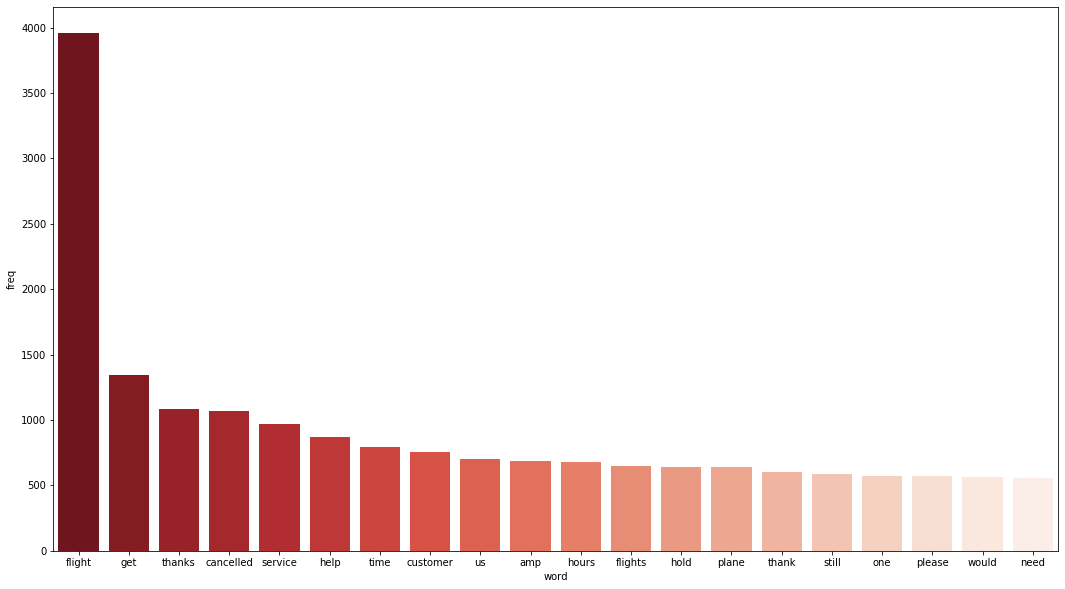

In [50]:
cv = CountVectorizer()
bow = cv.fit_transform(tweets_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Reds_r")
plt.show();

In [224]:
# Add clean_text column to the dataframe
tweets_eda['clean_text'] = tweets_clean
tweets_eda.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment,clean_text,airline
0,4,2,0,0,0,0,0,0,hi booked flight sunday morning still haven’t ...,Virgin America
1,10,1,0,0,0,0,0,1,rt get weird new flights austin boston austin ...,Virgin America
2,13,1,0,0,1,0,0,0,shirt pretty mild in…,Virgin America
3,18,1,0,0,0,0,0,-1,truly wonderful work sir honor honor us service…,Virgin America
4,11,1,0,0,0,0,0,-1,contact us functioning via sat email available,Virgin America


# Prediction Model

In [191]:
# Split data into test and train, test size is 10%
X_train, X_test, y_train, y_test = train_test_split(tweets_eda.drop('airline_sentiment', axis=1), 
                                                    tweets_eda.airline_sentiment, test_size=0.1, random_state=37)

In [192]:
# Based on http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
def grid_vect(clf, parameters_clf, X_train, X_test, parameters_text=None, vect=None, is_w2v=False):
    
    textcountscols = ['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags'
                      ,'count_mentions','count_urls','count_words']
    

    features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)

    
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)

    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)

    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [193]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}

# Parameter grid settings for Naive Bayes MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}

# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

# Parameter grid settings for RandomForest
# No parameters for random Forest because it requires long comoputation time. We will use the default parameters here
parameters_rfc = {}

In [194]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, **transform_params):
        return X[self.cols]

    def fit(self, X, y=None, **fit_params):
        return self

In [195]:
# 3 classifers will be tested here (Multinomial Naive Bayes, Logiostic Regression, Random Forest)
mnb = MultinomialNB()
logreg = LogisticRegression()
rfc = ensemble.RandomForestClassifier()

### Counter Vectorizer

In [60]:
# MultinomialNB
best_mnb_countvect = grid_vect(mnb, parameters_mnb, X_train, X_test, parameters_text=parameters_vect, 
                               vect = CountVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


done in 67.990s

Best CV score: 0.775
Best parameters set:
	clf__alpha: 0.5
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.777


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86       940
     neutral       0.63      0.50      0.56       292
    positive       0.69      0.63      0.66       232

   micro avg       0.78      0.78      0.78      1464
   macro avg       0.72      0.68      0.69      1464
weighted avg       0.77      0.78      0.77      1464



In [61]:
# LogisticRegression
best_logreg_countvect = grid_vect(logreg, parameters_logreg, X_train, X_test, parameters_text=parameters_vect, 
                               vect = CountVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.8min finished
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


done in 232.250s

Best CV score: 0.792
Best parameters set:
	clf__C: 1.0
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.803


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88       940
     neutral       0.66      0.60      0.63       292
    positive       0.77      0.63      0.69       232

   micro avg       0.80      0.80      0.80      1464
   macro avg       0.76      0.71      0.73      1464
weighted avg       0.80      0.80      0.80      1464



In [62]:
# RandomForest
best_rfc_countvect = grid_vect(rfc, parameters_rfc, X_train, X_test, parameters_text=parameters_vect, 
                               vect = CountVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


done in 106.348s

Best CV score: 0.746
Best parameters set:
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.748


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84       940
     neutral       0.59      0.40      0.48       292
    positive       0.74      0.48      0.58       232

   micro avg       0.75      0.75      0.75      1464
   macro avg       0.70      0.60      0.63      1464
weighted avg       0.73      0.75      0.73      1464



### Tf-idf

In [63]:
# MultinomialNB
best_mnb_tfidf = grid_vect(mnb, parameters_mnb, X_train, X_test, parameters_text=parameters_vect, 
                               vect = TfidfVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


done in 92.500s

Best CV score: 0.746
Best parameters set:
	clf__alpha: 0.25
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.762


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.78      0.94      0.85       940
     neutral       0.67      0.38      0.48       292
    positive       0.72      0.52      0.60       232

   micro avg       0.76      0.76      0.76      1464
   macro avg       0.73      0.61      0.65      1464
weighted avg       0.75      0.76      0.74      1464



In [64]:
# LogisticRegression
best_logreg_tfidf = grid_vect(logreg, parameters_logreg, X_train, X_test, parameters_text=parameters_vect, 
                               vect = TfidfVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.5min finished
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


done in 213.997s

Best CV score: 0.780
Best parameters set:
	clf__C: 1.0
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.796


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.83      0.93      0.87       940
     neutral       0.68      0.53      0.59       292
    positive       0.77      0.59      0.67       232

   micro avg       0.80      0.80      0.80      1464
   macro avg       0.76      0.68      0.71      1464
weighted avg       0.79      0.80      0.79      1464



In [65]:
# RandomForest
best_rfc_tfidf = grid_vect(rfc, parameters_rfc, X_train, X_test, parameters_text=parameters_vect, 
                               vect = TfidfVectorizer())

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


done in 81.568s

Best CV score: 0.744
Best parameters set:
	features__pipe__vect__max_df: 0.75
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.753


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.77      0.94      0.85       940
     neutral       0.60      0.38      0.47       292
    positive       0.80      0.45      0.58       232

   micro avg       0.75      0.75      0.75      1464
   macro avg       0.72      0.59      0.63      1464
weighted avg       0.74      0.75      0.73      1464



### Conclusion
* All classifiers achieve better results when using the features of the CountVectorizer compare to Tf-idf Vectorizer.
* Overall, Logistic Regression outperforms the other classifiers

Best parameters:
* C value of 1
* L2 regularization
* max_df: 0.5 or maximum document frequency of 50%.
* min_df: 1 or the words need to appear in at least 2 tweets
* ngram_range: (1, 2), both single words as bi-grams are used

Evaluation metrics:
* A **test accuracy** of 80.7%, which is better than what we would achieve by setting the prediction for all observations to the majority class (*negative* which would give 62.69% accuracy).
* The **Precision** is high for the negative class. For instance, of all cases that we predict as negative, 80% is indeed negative. it is relatively good for positive and neutral classes.
* The **Recall** is very high for negatiev class, and relatively low for the neutral and positive classes. Of all neutral cases in our test data, we only predict 62% as being neutral.

# Apply the best model on new scrapped tweets (Dec 2019)
Data dor American airlines tweets where scrapped in December 2019. A total of 4,000 tweets where scrapped. the scrapping querry code is in the following link: https://github.com/romer1979/Final-Capstone-Project/blob/master/Tweepy%20Scrpit.ipynb

In [202]:
tweets_test = pd.read_csv("C:/Users/rabia/Desktop/Thinkful/Final/test.csv")

In [203]:
tweets_test.head()

,Unnamed: 0,text
0,0,@AmericanAir hi! i booked my flight sunday mor...
1,1,RT @AmericanAir: It's about to get weird — new...
2,2,@LucienGreaves @inked_witch @PostLookout @jesu...
3,3,@GarySinise @AmericanAir @GarySiniseFound Trul...
4,4,@AmericanAir The contact us is not functioning...


### Sentiment Labeling
Sentiment labeling of the tweets using SentimentIntensityAnalyzer (SIA) from nltk.sentiment.vader library.

In [204]:
tweets_label = tweets_test['text']
sia = SIA()
results = []

for line in tweets_label:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'text': '@AmericanAir hi! i booked my flight sunday morning but still haven’t received ticket '
          'information.'},
 {'compound': -0.1779,
  'neg': 0.075,
  'neu': 0.925,
  'pos': 0.0,
  'text': "RT @AmericanAir: It's about to get weird — new flights from Austin to Boston and Austin "
          'to San Jose starting in April. https://t.co/gjTmcfU…'},
 {'compound': 0.4939,
  'neg': 0.0,
  'neu': 0.789,
  'pos': 0.211,
  'text': '@LucienGreaves @inked_witch @PostLookout @jesusweenus @AmericanAir @satanic_temple_ '
          'That t-shirt is pretty mild in… https://t.co/3djlEuh7DJ'}]


In [205]:
tweets_test = pd.DataFrame.from_records(results)
tweets_test['label'] = 0
tweets_test.loc[tweets_test['compound'] > 0, 'label'] = 1
tweets_test.loc[tweets_test['compound'] < 0, 'label'] = -1
tweets_test.head()

,compound,neg,neu,pos,text,label
0,0.0000,0.000,1.000,0.000,@AmericanAir hi! i booked my flight sunday mor...,0
1,-0.1779,0.075,0.925,0.000,RT @AmericanAir: It's about to get weird — new...,-1
2,0.4939,0.000,0.789,0.211,@LucienGreaves @inked_witch @PostLookout @jesu...,1
3,0.9230,0.000,0.494,0.506,@GarySinise @AmericanAir @GarySiniseFound Trul...,1
4,0.0000,0.000,1.000,0.000,@AmericanAir The contact us is not functioning...,0


In [206]:
tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
compound    4000 non-null float64
neg         4000 non-null float64
neu         4000 non-null float64
pos         4000 non-null float64
text        4000 non-null object
label       4000 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 187.6+ KB


In [234]:
tweets_test_eda = TextCounts().fit_transform(tweets_test.text)
# Add airline_sentiment to tweets_eda
tweets_test_eda['airline_sentiment'] = tweets_test['label']
tweets_test_eda.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment
0,15,1,0,0,1,0,0,0
1,26,1,0,1,0,1,0,-1
2,17,6,0,0,0,1,0,1
3,20,3,0,0,1,1,0,1
4,15,1,0,0,1,0,0,0


In [235]:
tweets_test_clean = CleanText().fit_transform(tweets_test['text'])
tweets_test_clean.head()

0    hi booked flight sunday morning still haven’t ...
1    rt get weird new flights austin boston austin ...
2                                shirt pretty mild in…
3     truly wonderful work sir honor honor us service…
4       contact us functioning via sat email available
Name: text, dtype: object

In [236]:
tweets_test_eda['clean_text'] = tweets_test_clean

In [237]:
tweets_test_eda.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment,clean_text
0,15,1,0,0,1,0,0,0,hi booked flight sunday morning still haven’t ...
1,26,1,0,1,0,1,0,-1,rt get weird new flights austin boston austin ...
2,17,6,0,0,0,1,0,1,shirt pretty mild in…
3,20,3,0,0,1,1,0,1,truly wonderful work sir honor honor us service…
4,15,1,0,0,1,0,0,0,contact us functioning via sat email available


In [242]:
X = tweets_test_eda.drop('airline_sentiment', axis=1)
Y = tweets_test_eda['airline_sentiment']

In [243]:
textcountscols = ['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags'
                      ,'count_mentions','count_urls','count_words']
    
features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                         , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text'))
                                              , ('vect', CountVectorizer(max_df=0.5, min_df=1, ngram_range=(1,2)))]))]
                       , n_jobs=-1)

pipeline = Pipeline([
    ('features', features)
    , ('clf', LogisticRegression(C=1.0, penalty='l2'))
])

best_model = pipeline.fit(X,Y)

In [244]:
tweets_test_eda['predicted_sentiment'] = best_model.predict(tweets_test_eda)

In [245]:
correct_prediction_pctg = len(tweets_test_eda[(tweets_test_eda['predicted_sentiment'] == tweets_test_eda['airline_sentiment'])]) * 100/len(tweets_test_eda)
correct_prediction_no =len(tweets_test_eda[(tweets_test_eda['predicted_sentiment'] == tweets_test_eda['airline_sentiment'])])
print('The model correctly prediction a total of {} tweets with a prediction accuracy of {} %'.format(correct_prediction_no, correct_prediction_pctg))

The model correctly prediction a total of 3972 tweets with a prediction accuracy of 99.3 %


The model was able to correctly predict the sentiment of 3972 tweets out of 4000 with an accuracy of 99.3%. 

### Tweets Sentiment (2019)

In [261]:
tweets_test2 = tweets_test_eda.drop(['predicted_sentiment'], axis=1)

In [267]:
# Modify values of sentiment to categorical strings
sentiment = {-1 : 'negative', 0 : 'neutral', 1 : 'positive'}
tweets_test2['airline_sentiment'] = tweets_test2['airline_sentiment'].map(lambda x: sentiment[x])

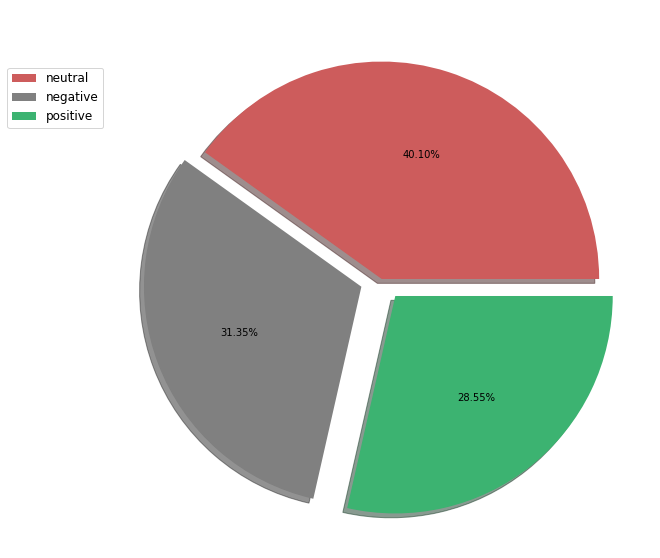

In [255]:
plt.figure(figsize=(18,10))

size = tweets_test2['airline_sentiment'].value_counts().tolist()
colors = ['indianred', 'grey', 'mediumseagreen']
labels = tweets_test['airline_sentiment'].unique().tolist()
explode = [0, 0.1, 0.1]

plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.show()

In 2019, The sentiment of the tweets is more balanced. This showscustomer satsfaction improvement compare to 2015.

### Most Repeated Words in Negative Tweets (American 2019)
**Flight** again is the top repeated word. Words like **now, hour, help** are frequently repeated in 2019 tweets as the case in 2015. Words like **delay, day, delayed** are relatively more frequent in 2019. American airlines might have increasing passengers furstration because of delayed flight.

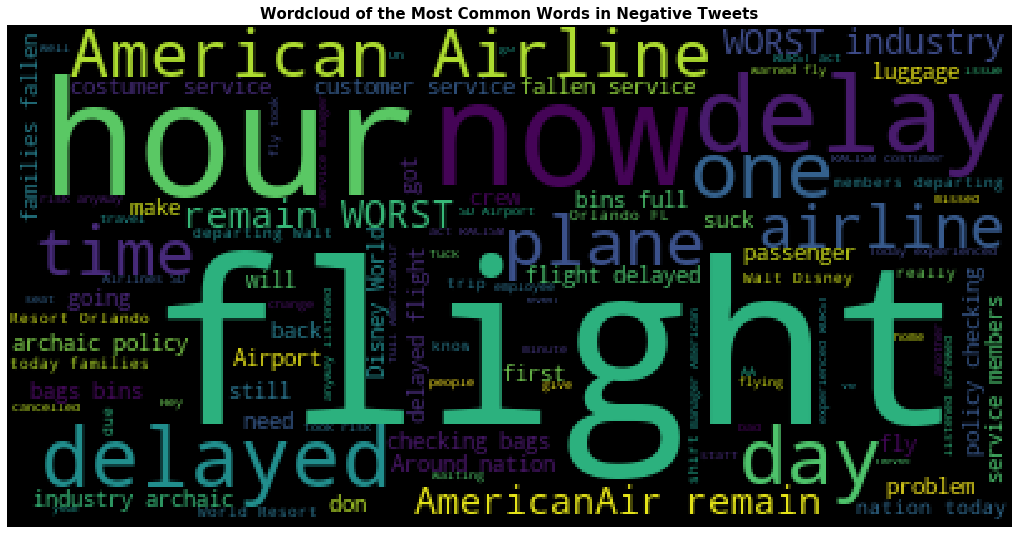

In [263]:
# Generates a wordcloud of the most common words in negative tweets
df=tweets_test[tweets_test['airline_sentiment']== 'negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

### Most Repeated Words in All Tweets (American 2019)
**Flight** is at the top. **rt** is a word used in twitter to relate to retweet. Other words are related to customer service and time related issues (delayed, today, day, days)

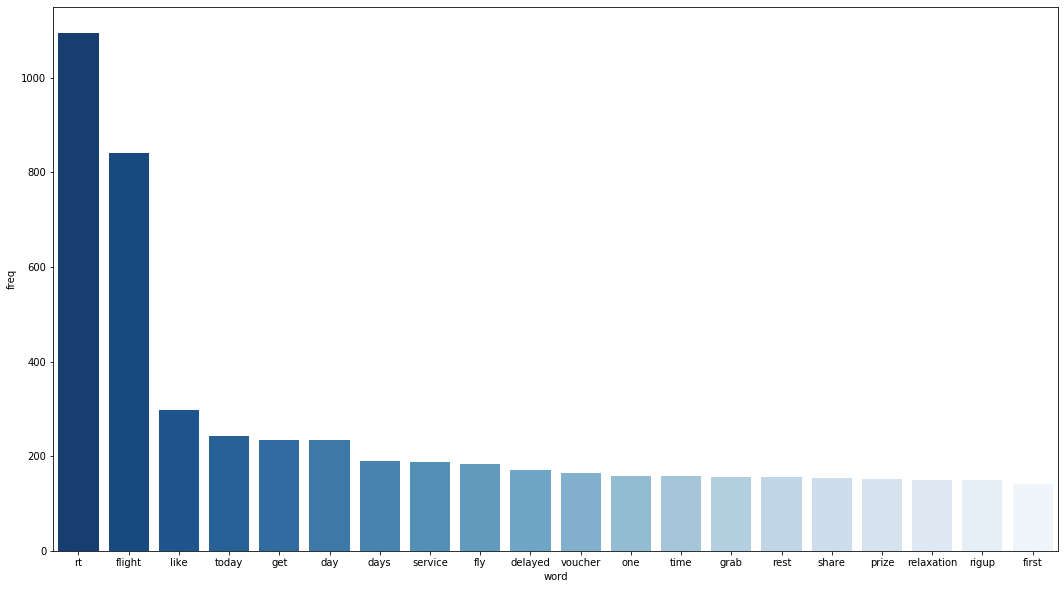

In [264]:
cv = CountVectorizer()
bow = cv.fit_transform(tweets_test_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Blues_r")
plt.show();

# Unsupervised Learning (Clustering of American Airlines 2019 Tweets)

In [268]:
# Modify values of sentiment to numerical values
sentiment = {'negative' : -1, 'neutral' : 0, 'positive' : 1}
tweets_test2['airline_sentiment'] = tweets_test2['airline_sentiment'].map(lambda x: sentiment[x])

### K-Means

In [269]:
# Make sure the number of rows divides evenly into four samples.
rows = tweets_test2.shape[0] - tweets_eda.shape[0] % 4
tweets_test2 = tweets_test2.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = tweets_test2.drop(['clean_text'], axis = 1)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)
X3, X4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

In [270]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means.
# We use k-means to fit a model to the data, then store the predicted values 
for counter, data in enumerate([X1, X2, X3, X4]):
     
    # Generate cluster predictions and store them for clusters 2 to 5.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [304]:
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1 ,X2 ,X3 ,X4]):
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [272]:
# Sorting sihoilette scores
score.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,sil_score,silhouette_score
9,clust2_sample3,NaN,0.589302
0,clust2_sample0,NaN,0.586097
6,clust2_sample2,NaN,0.572406
3,clust2_sample1,NaN,0.570552
1,clust3_sample0,NaN,0.429406
4,clust3_sample1,NaN,0.427104
10,clust3_sample3,NaN,0.425898
7,clust3_sample2,NaN,0.420252
2,clust4_sample0,NaN,0.385448
8,clust4_sample2,NaN,0.371585


In [273]:
# checking the number of rows at each sample adn check if they are equal
print(len(X1))
print(len(X2))
print(len(X3))
print(len(X4))

1000
1000
1000
1000


### Affinity Propagation

In [274]:
from sklearn.cluster import AffinityPropagation
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:4000][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [275]:
# Sorting sihoilette scores
score_af.sort_values(by='AF', ascending=False)

,cluster_pred,AF
2,clust40_sample2,0.213695
3,clust36_sample3,0.200124
0,clust74_sample0,0.174466
1,clust58_sample1,0.163868


**The best model is K-Means with 2 clusters**

### Clustering Model

In [110]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

In [111]:
cluster_0 = X[y_pred == 0]
cluster_1 = X[y_pred == 1]
print('cluster_0 count =', len(cluster_0))
print('cluster_1 count =', len(cluster_1))

cluster_0 count = 2819
cluster_1 count = 1181


The data is dvivided into 2 clusters, the first cluster has 70% of the tweets, while the other cluster has the remaining 30%

In [292]:
y = pd.DataFrame(y_pred)
y.columns = ['cluster']
tweets_test_cluster = tweets_test.join(y, how = 'inner')
tweets_test_cluster.head()

,compound,neg,neu,pos,text,label,airline_sentiment,cluster
0,0.0000,0.000,1.000,0.000,@AmericanAir hi! i booked my flight sunday mor...,0,neutral,1
1,-0.1779,0.075,0.925,0.000,RT @AmericanAir: It's about to get weird — new...,-1,negative,0
2,0.4939,0.000,0.789,0.211,@LucienGreaves @inked_witch @PostLookout @jesu...,1,positive,0
3,0.9230,0.000,0.494,0.506,@GarySinise @AmericanAir @GarySiniseFound Trul...,1,positive,1
4,0.0000,0.000,1.000,0.000,@AmericanAir The contact us is not functioning...,0,neutral,1


### Tweets Sentiment for each Cluster (2019)

In [293]:
# Datframe for each cluster
test_cluster_0 = tweets_test_cluster.loc[tweets_test2_cluster['cluster'] == 0]
test_cluster_1 = tweets_test_cluster.loc[tweets_test2_cluster['cluster'] == 1]

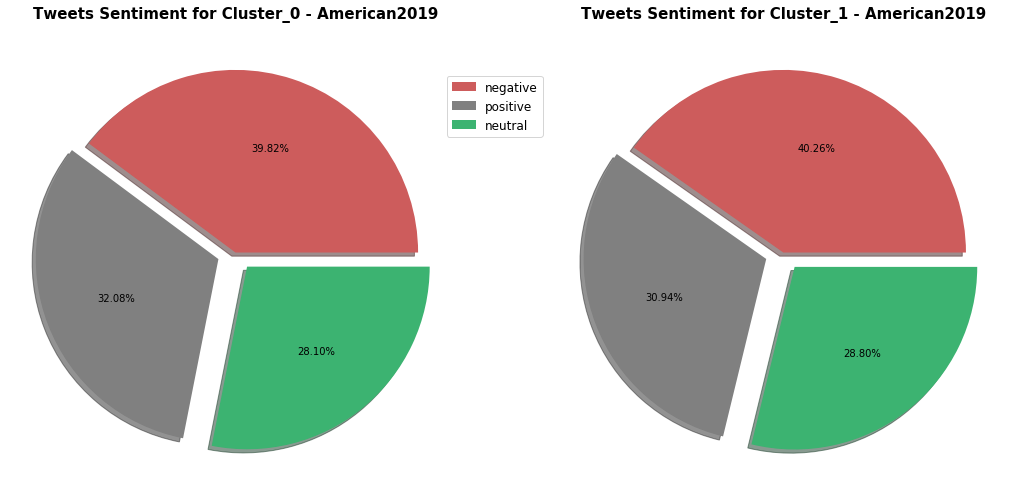

In [294]:
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
size = test_cluster_0['airline_sentiment'].value_counts().tolist()
colors = ['indianred', 'grey', 'mediumseagreen']
labels = test_cluster_0['airline_sentiment'].unique().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Cluster_0 - American2019', fontweight="bold", fontsize = 15)
plt.axis('off')

plt.subplot(1,2,2)
size = test_cluster_1['airline_sentiment'].value_counts().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Cluster_1 - American2019', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(-0.25,0.9), prop={'size': 12}, loc="upper left")

plt.show()

No big difference between the clsuters in terms of sentiment. Cluster_1 has slightly more percentage of negative tweets

### Most Repeated Words in Negative Tweets for each Cluster (American 2019)

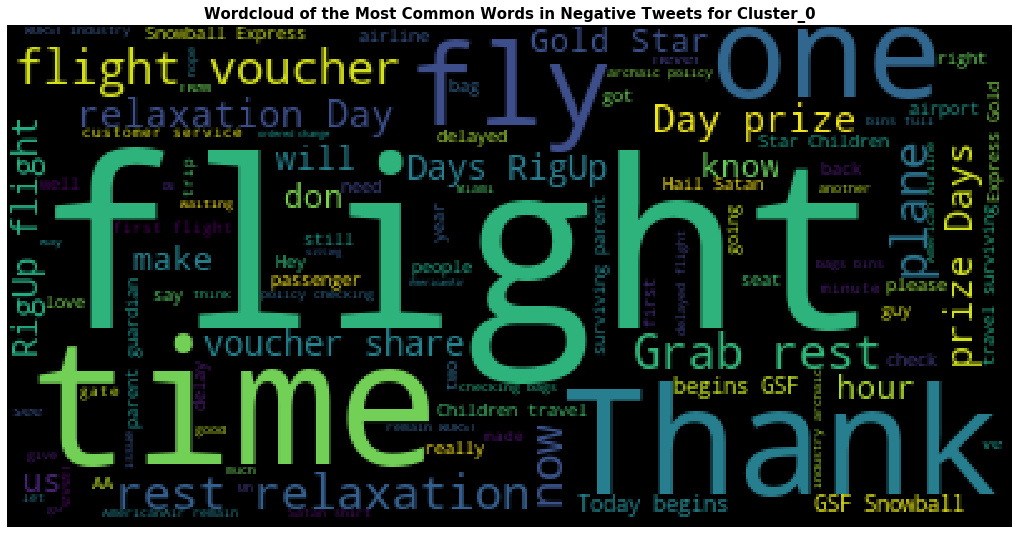

In [295]:
# Generates a wordcloud of the most common words in negative tweets
df=test_cluster_0[test_cluster_0['airline_sentiment']== 'negative']
words = ' '.join(test_cluster_0['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets for Cluster_0', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

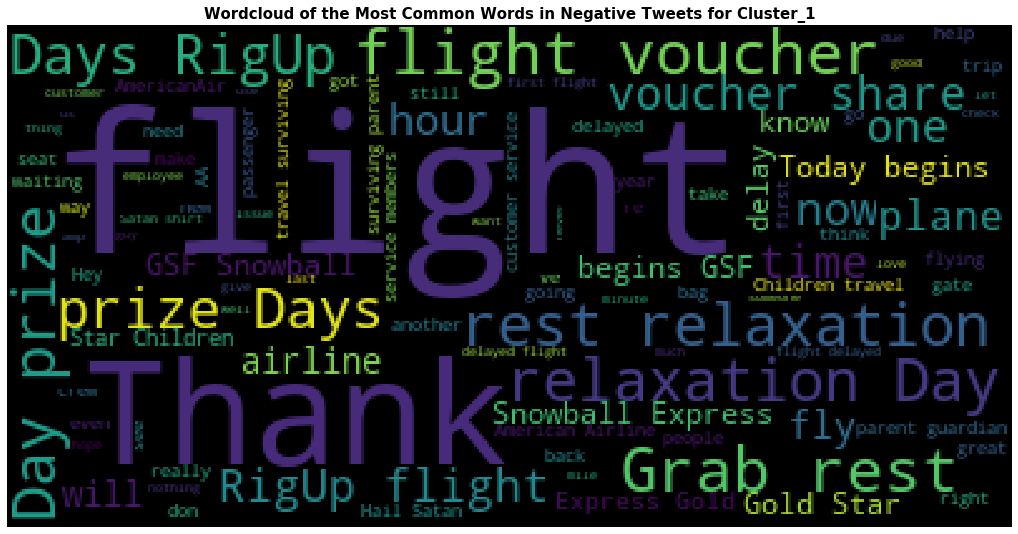

In [296]:
# Generates a wordcloud of the most common words in negative tweets
df=test_cluster_1[test_cluster_1['airline_sentiment']== 'negative']
words = ' '.join(test_cluster_1['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets for Cluster_1', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

**time** is repeatd more frequently in cluster_0 compare to cluster_1 which shows that passengers are more discussing time issues in cluster_0 tweets, while wordslike **rest, relaxation, flight voucher** are repeated more in cluster_1 tweets. This is indication about the difference in subject between the clusters. the difference is not obvious but cluster_0 tweets are more related to schedule issues like delayed flight or time of the flight, while cluster_1 are more related to the need for rest and compensation in terms of flight vouchers.

- Cluster_0 represents tweets related to time and schedulling issues, tweets are slightly negative to the rest of the tweets. 
- Cluster_1 represents tweets related to exhausting and vouchers. It might be related to issues passengers raised looking for compensation in terms of flight vouchers. 

# Unsupervised Learning (Clustering of American Airlines 2015 Tweets)

In [131]:
tweets_eda_american = tweets_eda.loc[(tweets_eda['airline'] == 'American') | (tweets_eda['airline'] == 'US Airways')]

In [132]:
tweets_eda_american.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment,clean_text,airline
8966,27,1,0,0,1,0,0,-1,better time call flight friday need change wor...,US Airways
8967,12,1,0,0,1,0,0,-1,one agents available speak,US Airways
8968,11,1,0,1,1,0,0,0,dm possible following,US Airways
8969,19,1,0,1,0,0,0,0,fortunately staff like lynn deedee actually un...,US Airways
8970,27,1,1,0,1,0,0,-1,hung another waste hour time supposed book one...,US Airways


### K-Means

In [297]:
# Make sure the number of rows divides evenly into four samples.
rows = tweets_eda_american.shape[0] - tweets_eda.shape[0] % 4
tweets_eda_american = tweets_eda_american.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = tweets_eda_american.drop(['clean_text', 'airline'], axis = 1)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)
X3, X4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

In [298]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means.
# We use k-means to fit a model to the data, then store the predicted values 
for counter, data in enumerate([X1, X2, X3, X4]):
     
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [299]:
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1 ,X2 ,X3 ,X4]):
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [300]:
# Sorting sihoilette scores
score.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,sil_score,silhouette_score
6,clust2_sample2,NaN,0.587210
9,clust2_sample3,NaN,0.578228
3,clust2_sample1,NaN,0.565470
0,clust2_sample0,NaN,0.560272
4,clust3_sample1,NaN,0.475546
10,clust3_sample3,NaN,0.465151
1,clust3_sample0,NaN,0.460590
7,clust3_sample2,NaN,0.457228
8,clust4_sample2,NaN,0.418254
11,clust4_sample3,NaN,0.417836


In [301]:
# checking the number of rows at each sample adn check if they are equal
print(len(X1))
print(len(X2))
print(len(X3))
print(len(X4))

1418
1418
1418
1418


In [302]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:3079][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [303]:
score_af.sort_values(by='AF', ascending=False)

,cluster_pred,AF
0,clust143_sample0,0.046296
2,clust102_sample2,0.037241
1,clust164_sample1,0.030626
3,clust199_sample3,-0.057564


**The best model is K-Means with 2 clusters**

### Clustering Model

In [141]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

In [142]:
cluster_0 = X[y_pred == 0]
cluster_1 = X[y_pred == 1]
print('cluster_0 count =', len(cluster_0))
print('cluster_1 count =', len(cluster_1))

cluster_0 count = 1975
cluster_1 count = 3697


The data is dvivided into 2 clusters, the first cluster has 35% of the tweets, while the other cluster has the remaining 65%

In [305]:
y = pd.DataFrame(y_pred)
y.columns = ['cluster']
tweets_cluster = pd.concat([tweets_eda_american.reset_index(drop=True),y.reset_index(drop=True)], axis=1)
# Modify values of sentiment to numerical values
sentiment = { -1 : 'negative', 0 : 'neutral', 1 : 'positive'}
tweets_cluster['airline_sentiment'] = tweets_cluster['airline_sentiment'].map(lambda x: sentiment[x])
negativereaon_american = tweets_american['negativereason'].tolist()
tweets_cluster['negativereason'] = negativereaon_american
tweets_cluster.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,airline_sentiment,clean_text,airline,cluster,negativereason
0,27,1,0,0,1,0,0,negative,better time call flight friday need change wor...,US Airways,1,Flight Booking Problems
1,12,1,0,0,1,0,0,negative,one agents available speak,US Airways,0,Customer Service Issue
2,11,1,0,1,1,0,0,neutral,dm possible following,US Airways,0,NaN
3,19,1,0,1,0,0,0,neutral,fortunately staff like lynn deedee actually un...,US Airways,1,NaN
4,27,1,1,0,1,0,0,negative,hung another waste hour time supposed book one...,US Airways,1,Customer Service Issue


In [306]:
cluster_0 = tweets_cluster.loc[tweets_cluster['cluster'] == 0]
cluster_1 = tweets_cluster.loc[tweets_cluster['cluster'] == 1]

### Tweets Sentiment for each Cluster (2015)

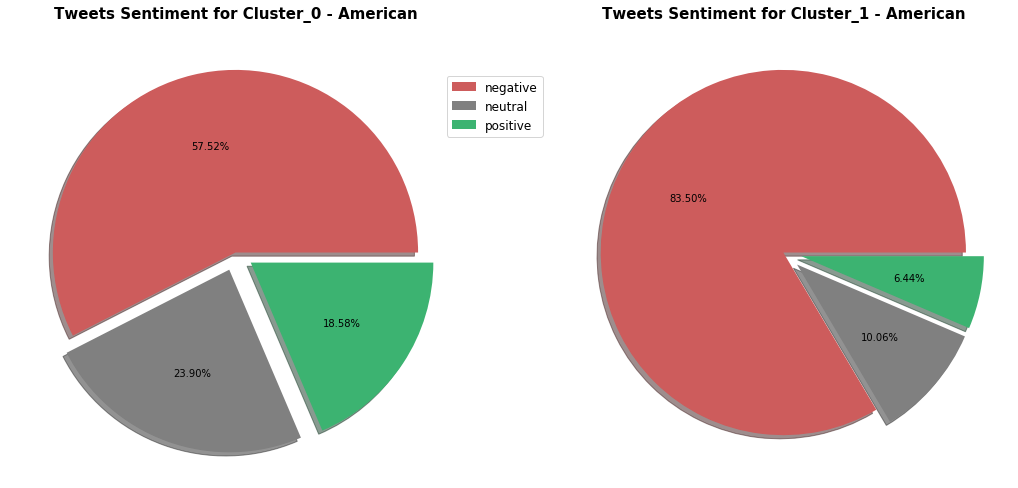

In [307]:
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
size = cluster_0['airline_sentiment'].value_counts().tolist()
colors = ['indianred', 'grey', 'mediumseagreen']
labels = cluster_0['airline_sentiment'].unique().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Cluster_0 - American', fontweight="bold", fontsize = 15)
plt.axis('off')

plt.subplot(1,2,2)
size = cluster_1['airline_sentiment'].value_counts().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tweets Sentiment for Cluster_1 - American', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels, bbox_to_anchor=(-0.25,0.9), prop={'size': 12}, loc="upper left")

plt.show()

There is a big sifference between the clusters. Cluster_0 looks like it is representing more balanced sentiment among the tweets, while cluster_1 tweets are mostly negative.

### Most Repeated Words in Negative Tweets for each Cluster (American 2015)

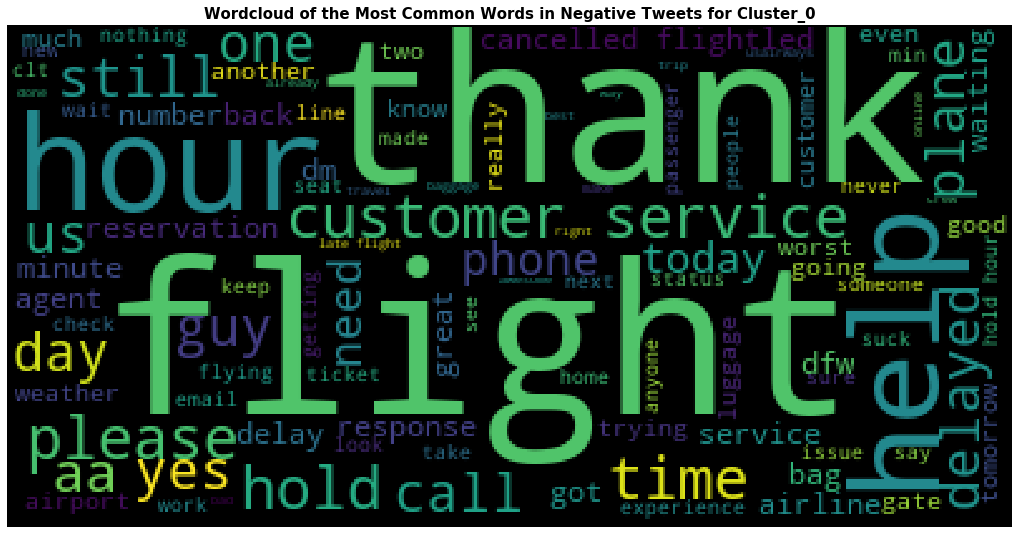

In [308]:
# Generates a wordcloud of the most common words in negative tweets
df=cluster_0[cluster_0['airline_sentiment']== 'negative']
words = ' '.join(cluster_0['clean_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets for Cluster_0', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

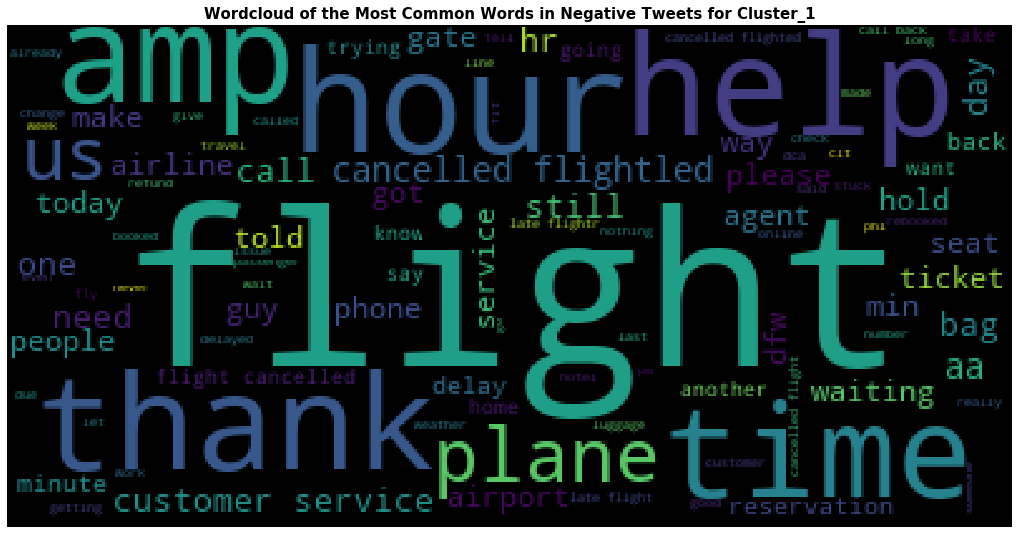

In [309]:
# Generates a wordcloud of the most common words in negative tweets
df=cluster_1[cluster_1['airline_sentiment']== 'negative']
words = ' '.join(cluster_1['clean_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words = 100
                     ).generate(cleaned_word)

plt.figure(1,figsize=(18, 10))
plt.imshow(wordcloud)
plt.title('Wordcloud of the Most Common Words in Negative Tweets for Cluster_1', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.show()

Cluster_1 tweets has words like **time, help, hour, thanks** repeated mre frequently compare to the rest of the words. Cluster_0 has the same words as top repeated words but they are not obvously sifferent from other words as the case with cluster_1. Words like time, customer service, delayed are frequently repeated as well.

### Reasons for Negative Tweets for each Cluster(American 2015)

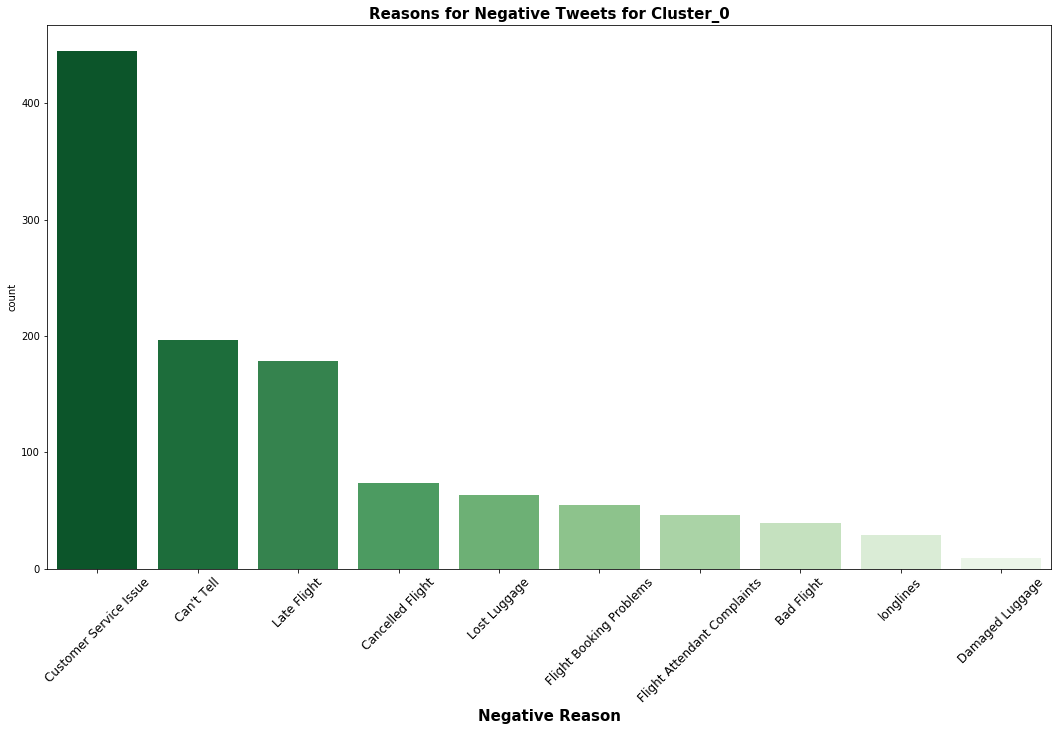

In [311]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'negativereason', data = cluster_0, order = cluster_0['negativereason'].value_counts().index, 
              palette = "Greens_r")
plt.title('Reasons for Negative Tweets for Cluster_0', fontweight="bold", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Negative Reason', fontsize = 15, fontweight="bold")
plt.show()

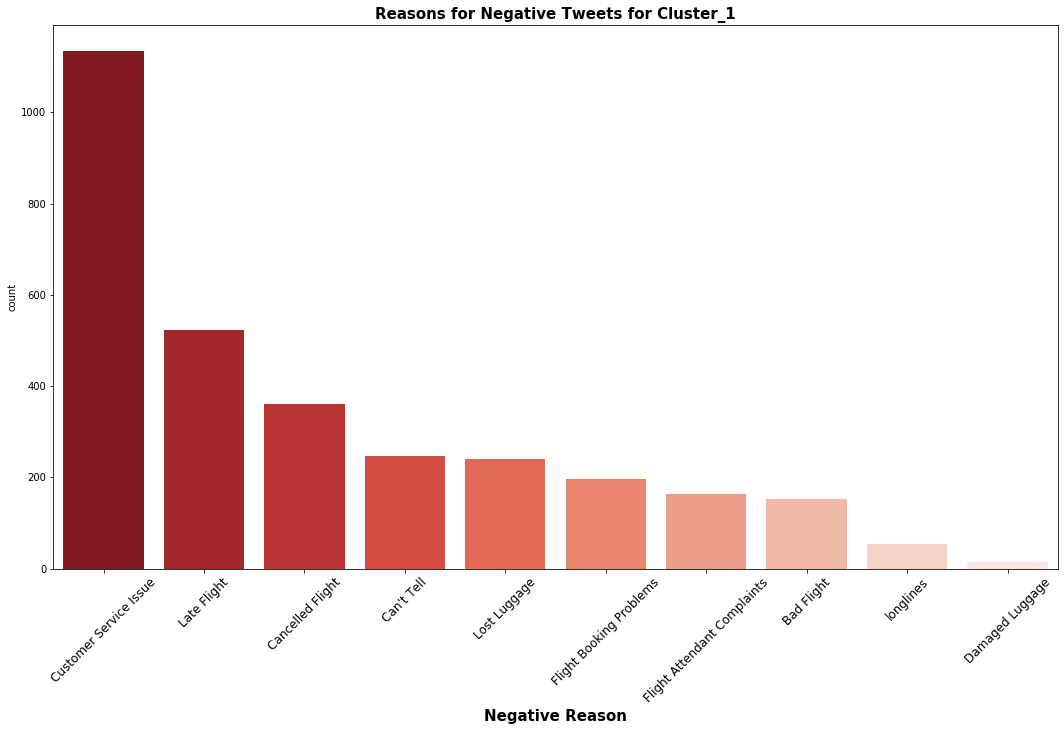

In [310]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'negativereason', data = cluster_1, order = cluster_1['negativereason'].value_counts().index, 
              palette = "Reds_r")
plt.title('Reasons for Negative Tweets for Cluster_1', fontweight="bold", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Negative Reason', fontsize = 15, fontweight="bold")
plt.show()

- Late and Cancelled Flights are more represented in cluster_1 negative tweets compare to cluster_0.
- "Can't Tell" or no specific reason negative tweets has a small proportion in cluster_1 negative tweets while it is ranked 2 amon the reason for cluster_0 negative tweets.

- Cluster_0 represents tweets with a balanced group of sentiments, theese tweets has a good propotion of negative tweets with no clear reason. It has less late or cancelled flights issues compare to cluster_1 
- Cluster_1 represents tweets from more furstrated passengers. these tweets focuse more on customer service and deklayed and cancelled flights.

# Conclusion

**Analysis**
- American airlines (American + US Airways, since they are merged few months after Feb 2015) are the two airline with the highest number and percentage of negative tweets among the top US airlines. this is the issue I ahve analyzed, and came up with the following reasons:
    - American airlines has a high propotion of negative tweets related to customer service issues. almost 50% of the customer service related tweets were addressing American. 
    - The more furstrated American airlines paqssengers were furstrated due to issues related to late and cancelled flights. Together with a poor customer service this resulted in escalated negative tweets on the airline.
    - It is not possible to control the delay or cancellation of flights, but it can be minimized by more efficient planning and management. When flight are cancelled or delayed, American should provide a good customer service to use this setback as an opportunity of turning negative thoughts to positive ones. American Airlines did not manage to do that and this resulted in more furstrated customers and the highest number and percentage of negative tweets during February 2015. 

**Prediction Model**
- A model using Count Vectorizer and Logistic Regression Classifer managed to predict the sentiment of the tweets with an accurcy prediction close to %80. This model can be used periodically to assesss customer satisfaction and monitor progress.
- I performed the model on a tweets data scrapped from tweeter in Dec 2019 to assess the model and perform analysis in 2019 data. I labeled the data using SentimentIntensityAnalyzer (SIA) from nltk.sentiment.vader library,Surprisingly, I got an accuracy of 99.3%.
- 2019 Tweets sentiments were more balanced and showed improvement in customer service.

**Clustering**
- I have performed unsupervised learning model (clustering) on both Feb 2015 data and Dec 2019 data, both of them was by using K-Means and 2 clusters:
    - 2015 data was easier to define the difference between the clusters, the first group of customers are balanced, there is a relatively high propotion of negative tweets with no clear reason, and less cancelled and late flights issues. The second group represents the furstrated customers tweets (83%), those custoimers are furstrated mainly due to customer service and flights schedule issues.
    - 2019 data was harder to define the difference between the clusters. Both clusters are balanced with slight difference between them. The first group represents tweets related to time and schedulling issues, tweets are slightly negative to the rest of the tweets. the second group represents tweets related to exhausting and vouchers. It might be related to issues passengers raised looking for compensation in terms of flight vouchers. 

# Weak Points

- There are several weak points in this analysis, but this model can be the abse of a stronger prediction model and better in depth analysis:
    - The size of the data is relatively small for tweets with limited number of words per tweet. The size of the data should be in hundred thousands or millions to achieve better result.
    - The sentiment labeling of tyhe data need to be improved. providing more key words and build aviation related sentiment labeling will improve the perormance. Deep learnign could be a way for more improvement.
    - Competitios data should be collected as well in the year 2019. This can help in identifying how American is doing compare to competitors as the case for year 2015, but due to time constraints I could not do it.
    - The tweets were collected in specific limited period of time (week or two from a specific year and month), this can not be generalized on the whole satisfaction of the customers, larger period span is advised.